(-0.3035912365591398,
 6.30369123655914,
 -0.06109590699043416,
 1.0611279069904345)

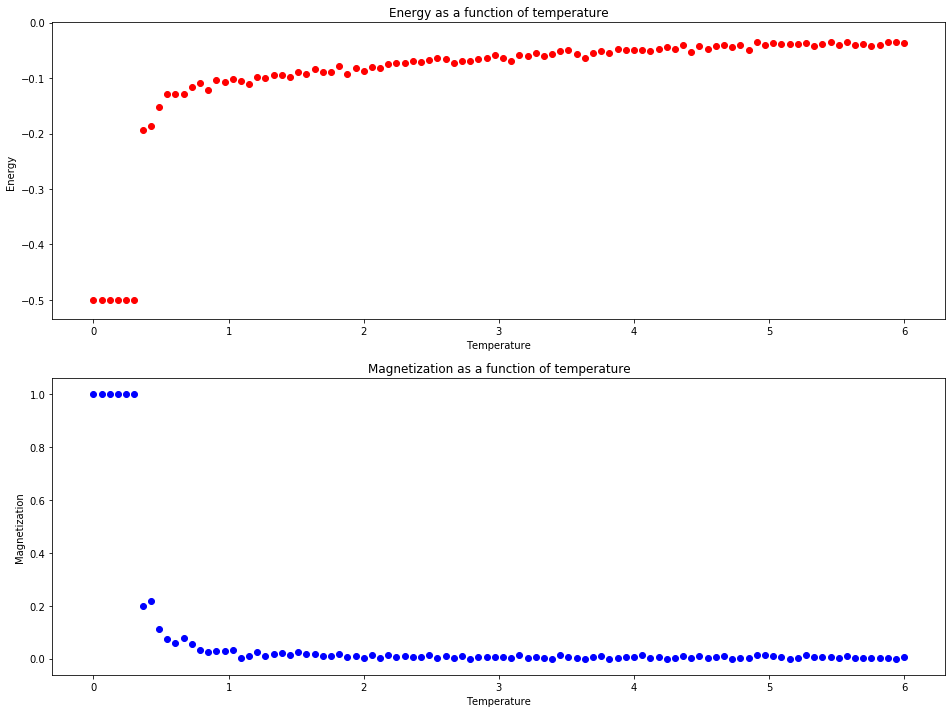

In [2]:
"""
# Coders: Chan, Mishra, Tahir, Tsega
# File: project_ising_part3.py
# Description: Spins are aligned as initial state, then system is heated under negative external magnetic field.
# Date: 2019/12/05
"""

# Imports and packages.
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand


# Define the core parameters for the system we want to test.
N       = 25        # Size of lattice (NxN for 2-D).
points  = 100       # Amount of points we will use for the temperature axis.
steps   = 100       # Amount of steps for our Monte-Carlo simulation.
kb      = 1         # Boltzmann constant.
ext_mag = -2         # External magnetic field value.


# Setup the parameters for plotting the energy and magnetization as a function of temperature.
temperature = np.linspace(0.0001, 6, points)         # Setup the temperature independent variable.
E_array     = np.zeros(points)                  # Setup the energy dependent variable.
M_array     = np.zeros(points)                  # Setup the magnetization dependent variable.
n           = 1 / (steps*N*N)                   # Standardization factor to obtain intensive values.


# Creates the system for all spins aligned, s_i = 1.
def initialize_system(N):   
    state = np.ones((N,N), dtype=int)
    return state


# Performs the flipping and checking via the Metropolis algorithim. This is no different than
# what we have already seen in Newman and other examples of the classic algorithim.
def metropolis(system, beta, ext_mag):
    # Setup loops which interate through each lattice-point.
    for i in range(N):
        for j in range(N):
                # Denote 's' to be some arbitrary lattice-point in our system.
                i = np.random.randint(N)
                j = np.random.randint(N)
                s =  system[i,j]
                # Gather the contributions from the 4 adjacent dipoles (Note the periodic boundary).
                neighborhood = system[(i+1)%N,j] + system[i,(j+1)%N] + system[(i-1)%N,j] + system[i,(j-1)%N]
                # The cost it would take to flip is the difference between initial energy states.
                dE = ((2 * s * neighborhood) + (2 * ext_mag))
                # Flip if the energy will be reduced.
                if dE < 0:
                    s *= -1
                # Flip if the Boltzmann condition is satisfied.
                elif rand() < np.exp(-beta * dE):
                    s *= -1
                # Register the flip into the lattice system.
                system[i,j] = s
    return system


# Calculate the energy of the system. This is done in a similar fashion to the previous function,
# in which we consider the 4 adjacent dipoles' interaction with the point selected. The interactions
# are summed for each lattice-point and finally divided by 4 (because s = \bar{s}).
# Note that once again, the periodic boundary conditions are applied.
def get_energy(system, ext_mag):
    energy = 0
    for i in range(len(system)):
        for j in range(len(system)):
            s = system[i,j]
            neighborhood = system[(i+1)%N, j] + system[i,(j+1)%N] + system[(i-1)%N, j] + system[i,(j-1)%N]
            energy += ((-s * neighborhood) - (ext_mag * s))
    return energy / 4


# Calculate the magnetization of the system. This is simple enough as by definition,
# the magnetization is just the sum of the spins.
def get_magnetization(system):
    magnetization = np.sum(system)
    return magnetization


# Loop through each temperature point, which we will use to calculate the energy and magnetization with.
for i in range(points):
    E = 0
    M = 0
    # Insert our initial system and definition for beta.
    system  = initialize_system(N)
    beta    = 1.0 / (kb * temperature[i])
    # Setup a loop which will perform the MC simulations and obtain the energy/magnetization.
    for a in range(steps):
        metropolis(system, beta, ext_mag)           
        energy = get_energy(system, ext_mag)
        magnetization = get_magnetization(system)
        E += energy
        M += magnetization
    # Apply the standardization factor and we have the 'y-value' for a given temperature.
    E_array[i] = n*E
    M_array[i] = n*M


# Plot the data.
plot = plt.figure(figsize=(16, 12))  

# Figure for E(T).
plot.add_subplot(211);
plt.scatter(temperature, E_array, color='r')
plt.title('Energy as a function of temperature')
plt.xlabel("Temperature")
plt.ylabel("Energy ")
plt.axis('tight') 

# Figure for M(T).
plot.add_subplot(212);
plt.scatter(temperature, abs(M_array), color='b')
plt.title('Magnetization as a function of temperature')
plt.xlabel("Temperature")
plt.ylabel("Magnetization ")
plt.axis('tight')